In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [2]:
def load_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0

    return image

In [3]:
content_image = load_image("image1.jpg")
style_image = load_image("image2.jpg")

In [4]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [5]:
def apply_style(content, style):
    content = content.reshape((1, content.shape[0], content.shape[1], content.shape[2])).astype("float32")
    content = tf.convert_to_tensor(content)

    style = cv2.resize(style, (256, 256))
    style = style.reshape((1, style.shape[0], style.shape[1], style.shape[2])).astype("float32")

    outputs = model(tf.constant(content), tf.constant(style))
    stylized_image = outputs[0]

    return stylized_image

In [6]:
image = apply_style(content_image, style_image)

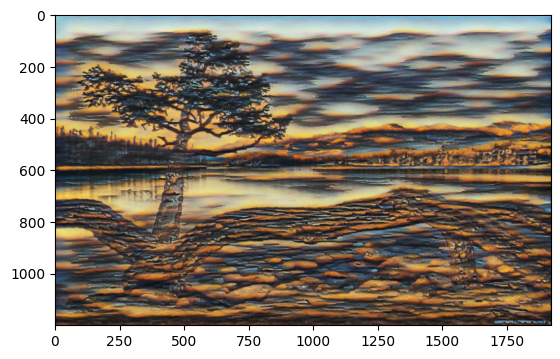

In [7]:
plt.imshow(image[0])